# 1.3 국가별 음주 데이터 분석하기

- country : 국가정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 국가의 대륙 정보

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 두 피처 간의 상관 계수 구하기

In [7]:
correlation = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(correlation)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [20]:
# 모든 항목에 대한 상관 계수 행렬 표시
#cols = ['beer_servings','spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
drinks.columns
# print(drinks.columns)
correlation = drinks[drinks.columns].corr(method = 'pearson')
print(correlation)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


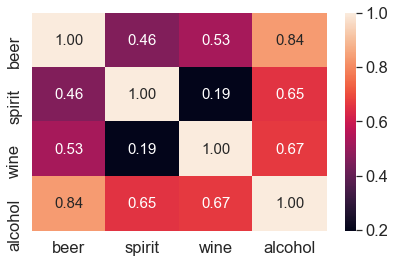

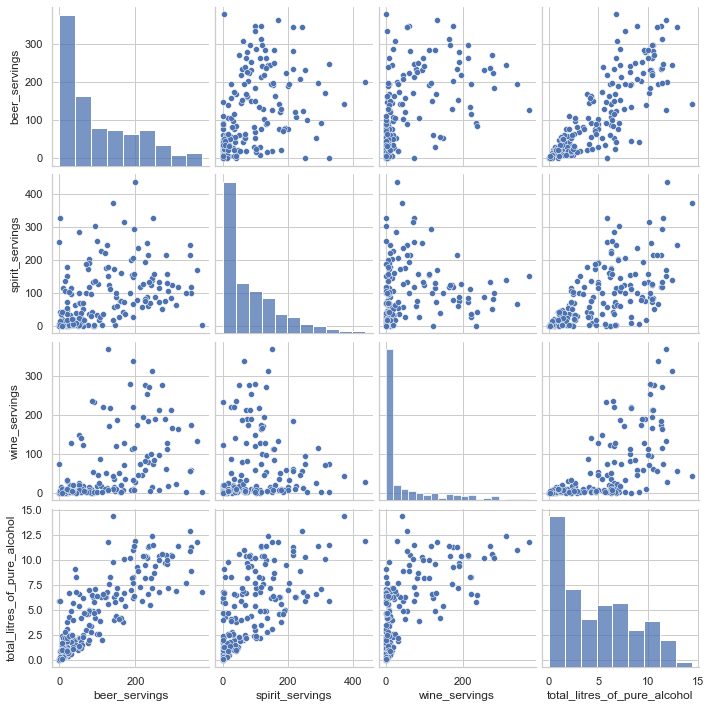

In [23]:
# heatmap, pairplot 기법 사용

import seaborn as sns 
import matplotlib.pyplot as plt 

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(correlation.values,
        cbar = True,
        annot = True,
        fmt = '.2f',
        annot_kws = {'size':15},
        yticklabels = cols_view,
        xticklabels = cols_view)

plt.tight_layout()
plt.show()

sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[drinks.columns], height=2.5)
plt.show()

## 결측 데이터 처리
- fillna() : 대륙에 대한 정보가 없는 국가.

In [24]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


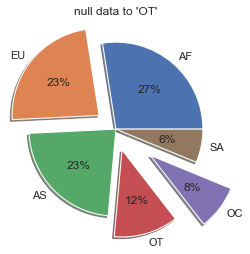

In [29]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0.25, 0, 0.25, 0.5, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

- agg() : apply() 함수와 거의 동일한 기능을 하지만, apply()에 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러 가지 연산 결과를 동시에 얻을 수 있는 함수

In [35]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [40]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙은?

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_over_mean = continent_mean[continent_mean > total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [42]:
# 평균 beer_servings가 가장 높은 대륙은 어디일까?

drinks.groupby('continent').beer_servings.mean().idxmax()

'EU'

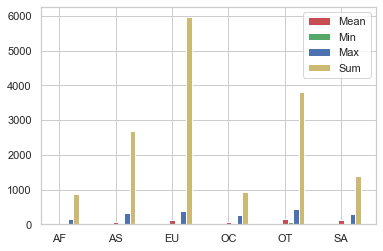

In [59]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()